# plot LAI from MODIS

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import h5py as h5

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [2]:
fname_LAI = "./data/postprocessed/ARW_LAI.h5"

In [3]:
data = pd.read_csv("./data/preprocessed/MODIS-LAI_ARW_evergreen.csv")

In [4]:
data.head()

,mean,median,max,min,date,month,year
0,2.298146,2.4,3.7,0.5,2002-07-04,7,2002
1,2.552810,2.6,4.1,0.3,2002-07-08,7,2002
2,2.616577,2.6,4.0,0.3,2002-07-12,7,2002
3,2.719975,2.8,4.1,0.5,2002-07-16,7,2002
4,2.372784,2.4,3.9,0.4,2002-07-20,7,2002


In [5]:
data.shape

(1584, 7)

In [6]:
data['datetime'] = pd.to_datetime(data['date'])

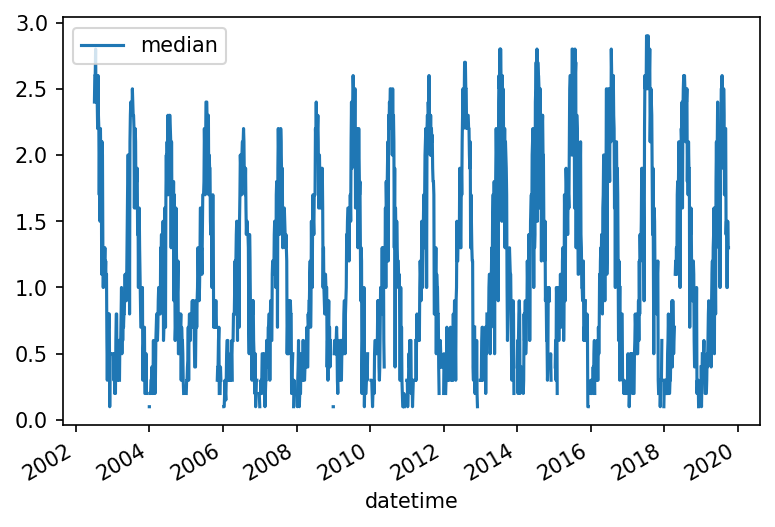

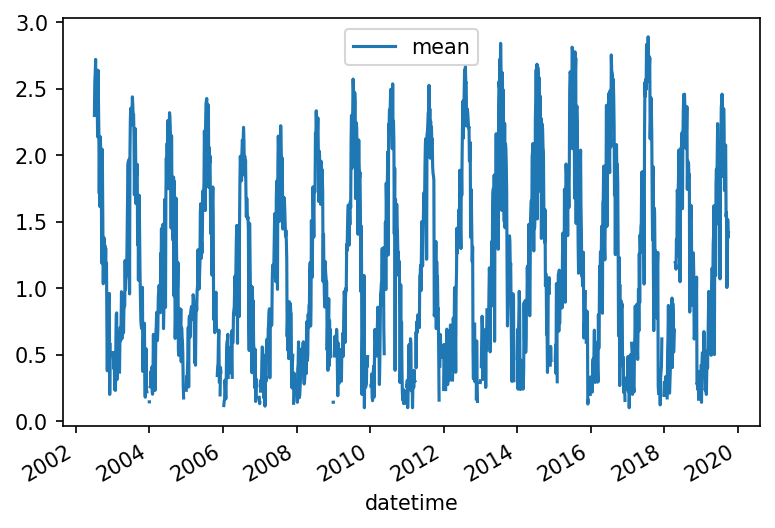

In [7]:
data.plot(x = 'datetime', y='median' )
data.plot(x = 'datetime', y='mean' )

## create monthly average

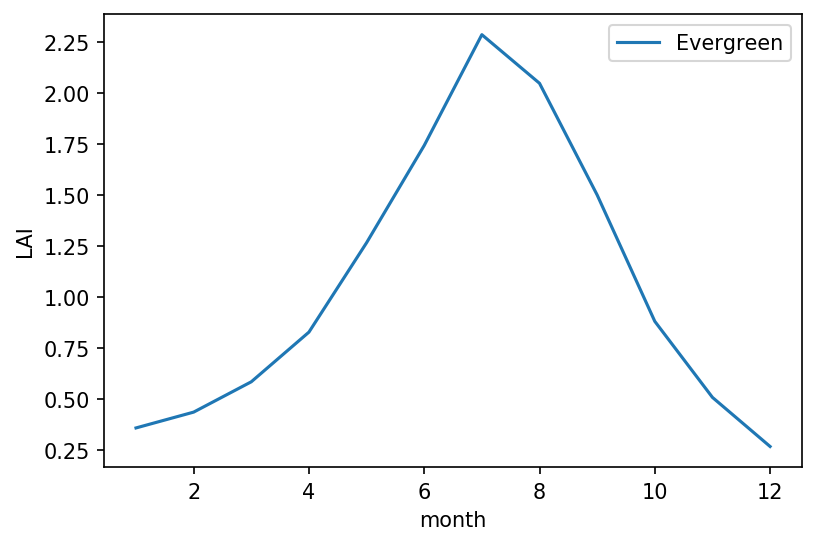

In [11]:
data.dropna(inplace = True)

monthly_data = data.groupby('month').mean()

monthly_data.plot(y='median')
plt.ylabel("LAI")
plt.legend(['Evergreen'])

In [1]:
default_LAI = [10.25, 9,8,7,7,9,11,14,15,13,12,12.5,11.5,10.25]

Text(0, 0.5, 'LAI')

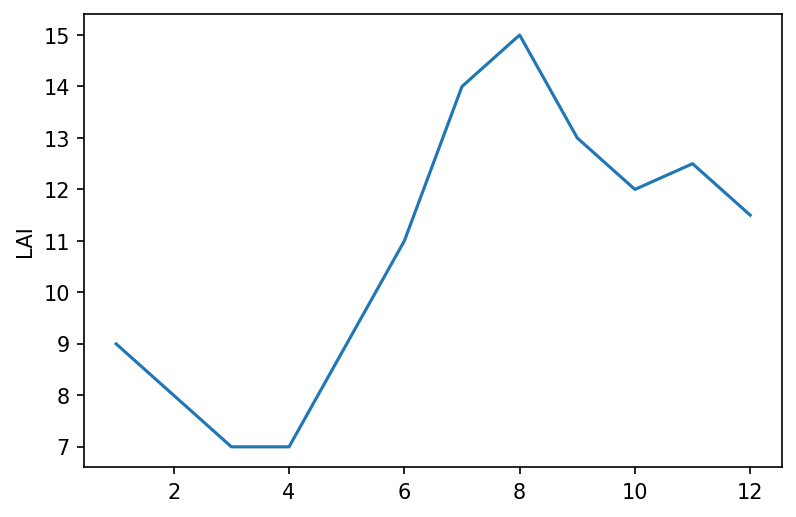

In [6]:
plt.plot(np.arange(12)+1, default_LAI[1:-1])
plt.ylabel("LAI")

## export to HDF5

In [15]:
times = [0, 1314000.,  3942000.,  6570000.,  9198000., 11826000., 14454000., 17082000., 19710000., 22338000.,
         24966000., 27594000., 30222000., 31536000]

In [16]:
LAI = [monthly_data['median'].values[0]] + monthly_data['median'].values.tolist() + [monthly_data['median'].values[-1]]

In [17]:
LAI_list = {
    'Evergreen Forest': "Evergreen LAI [-]",
    'Shrub/Scrub': "Shrub LAI [-]",
    'Deciduous Forest': "Deciduous LAI [-]"
}

In [18]:
with h5.File(fname_LAI,'w') as fout:
    fout.create_dataset("time [s]", data=times)
    
    for i in LAI_list.values():
        fout.create_dataset(i, data= LAI)